In [ ]:
!pip install transformers datasets evaluate

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainer, Seq2SeqTrainingArguments
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import torch

In [ ]:
!pip install -U datasets

In [ ]:
from datasets import load_dataset

dataset = load_dataset("MagedSaeed/xlsum_arabic_experimental", download_mode="force_redownload")
train_data = dataset["train"]
test_data = dataset["test"]

train-00000-of-00001.parquet:   0%|          | 0.00/80.9M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/11.3M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4689 [00:00<?, ? examples/s]

In [ ]:

train_data = dataset["train"].select(range(7000))
test_data = dataset["test"].select(range(1350))

In [ ]:
columns_to_remove = ["gem_id", "url", "title", "references"]
train_data = train_data.remove_columns(columns_to_remove)
test_data = test_data.remove_columns(columns_to_remove)
print("columns in train_data:", train_data.column_names)
print("columns in test_data:", test_data.column_names)

columns in train_data: ['target', 'text']
columns in test_data: ['target', 'text']


In [ ]:
model_name = "UBC-NLP/AraT5-base"
print("Loading model and tokenizer...")
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

Loading model and tokenizer...


tokenizer_config.json:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/2.44M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/98.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


pytorch_model.bin:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

In [ ]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 49.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu

In [ ]:
import stanza
import re
import pandas as pd
from datasets import Dataset

stanza.download('ar')
nlp = stanza.Pipeline('ar', processors='tokenize,mwt,pos,lemma', use_gpu=False)

def clean_and_lemmatize_text(text):
    text = re.sub(r"[^\w\s\u0600-\u06FF]", " ", text)
    text = re.sub(r"[\u064B-\u065F\u0670]", '', text)
    text = re.sub(r"http\S+|www.\S+", '', text)
    text = re.sub(r"\d+", '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    doc = nlp(text)
    lemmas = [word.lemma if word.lemma else word.text for sentence in doc.sentences for word in sentence.words]

    text_out = ' '.join(lemmas)
    text_out = re.sub(r"[\u064B-\u065F\u0670]", '', text_out)

    return text_out


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: ar (Arabic) ...


INFO:stanza:Downloaded file to /root/stanza_resources/ar/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: ar (Arabic):
| Processor | Package       |
-----------------------------
| tokenize  | padt          |
| mwt       | padt          |
| pos       | padt_charlm   |
| lemma     | padt_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


In [ ]:
for i in range(3):
    original = train_data[i]["text"]
    cleaned = clean_and_lemmatize_text(original)
    print(f"\n example {i+1}")
    print("Original:", original[:300], "...")
    print("Cleaned :", cleaned[:300], "...")



 example 1
Original: نشرت الشرطة الإسرائيلية أكثر من خمسة آلاف من حرس الحدود في أحياء القدس الشرقية. 

وتقول مراسلة بي بي سي في القدس،نوال أسعد، إن شابا فلسطينيا في منطقة الطور أصيب برصاصة مطاطية في الرأس نقل على اثرها للمستشفى.

كما اندلعت مواجهات عند حاجز قلنديا العسكري في مظاهرة قامت الشرطة بتفريقها باستخدام الغاز ال ...
Cleaned : نشر شرطة إسرائيلي أكثر من خمسة ألف من حرس حد في حي قدس شرقي و قال مراسلة بي بي سي في قدس ، نوال أسعد ، إن شاب فلسطيني في منطقة طور أصاب ب رصاصة مطاطي في رأس نقل على أثر هو ل مستشفى كما اندلع مواجهة عند حاجز قلنديا عسكري في مظاهرة قام شرطة ب تفريق هو ب استخدام غاز مسيل ل دموع و رصاص مطاطي و أضاف مراس ...

 example 2
Original: دميتري ميدفيديف

وقال ميدفيديف في كلمة القاها امام اجتماع لاعضاء حزب روسيا المتحدة الحاكم بثه التلفزيون الروسي "عندما يعمد عدد من شركائنا - اذا صح اطلاق هذه الصفة عليهم - الى امتحان صلابة روسيا من خلال فرض عقوبات عليها واطلاق شتى انواع التهديدات، من المهم علينا الا نرضخ لاغراءات الحلول السهلة بل علي ...
Cleaned : دميتري ميدفيديف و قال

Average text length: 421
Maximum text length: 4618
95% of texts below: 1168

Average summary length: 25
Maximum summary length: 219
95% of summaries below: 42


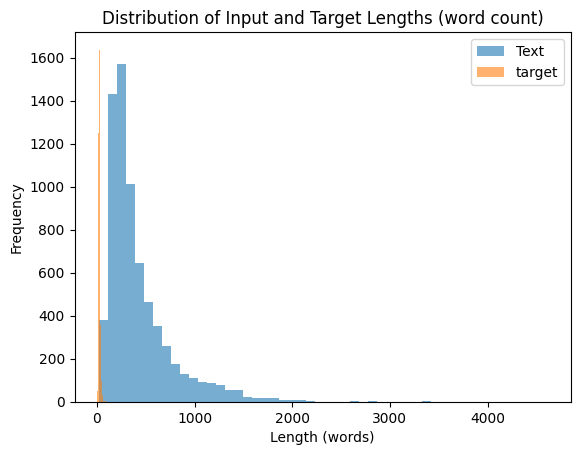

In [ ]:
import matplotlib.pyplot as plt

data = train_data

input_lengths = [len(myData["text"].split()) for myData in data]
target_lengths = [len(myData["target"].split()) for myData in data]

print("Average text length:", sum(input_lengths) // len(input_lengths))
print("Maximum text length:", max(input_lengths))
print("95% of texts below:", sorted(input_lengths)[int(0.95 * len(input_lengths))])

print("\nAverage summary length:", sum(target_lengths) // len(target_lengths))
print("Maximum summary length:", max(target_lengths))
print("95% of summaries below:", sorted(target_lengths)[int(0.95 * len(target_lengths))])

plt.hist(input_lengths, bins=50, alpha=0.6, label='Text')
plt.hist(target_lengths, bins=50, alpha=0.6, label='target')
plt.title("Distribution of Input and Target Lengths (word count)")
plt.xlabel("Length (words)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
mean_input_length = int(np.mean(input_lengths))
mean_target_length = int(np.mean(target_lengths))

print(f"Using max_length {mean_input_length} for Text Input and {mean_target_length} for Target.")


Using max_length 421 for Text Input and 25 for Target.


In [ ]:
def preprocess_function(batch):
    model_inputs = tokenizer(
        batch["text"],
        max_length=mean_input_length,
        truncation=True,
        padding='max_length'
    )
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            batch["target"],
            max_length=mean_target_length,
            truncation=True,
            padding='max_length'
        )
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_train = train_data.map(
    preprocess_function,
    batched=True,
    batch_size=64,
    num_proc=2,
    remove_columns=train_data.column_names
)
tokenized_test = test_data.map(
    preprocess_function,
    batched=True,
    batch_size=64,
    num_proc=2,
    remove_columns=test_data.column_names
)



Map (num_proc=2):   0%|          | 0/7000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3959: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3959: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map (num_proc=2):   0%|          | 0/1350 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3959: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3959: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(" Using GPU")
else:
    device = torch.device("cpu")
    print(" Using CPU")

model.to(device)


 Using GPU


T5ForConditionalGeneration(
  (shared): Embedding(110080, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(110080, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo

In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=8bee5d61fa26f98ae7d4326a7f09982231fe2c52843dc64f85e3793b6af3ac2a
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [ ]:
!pip install evaluate

In [ ]:
!pip install accelerate
!pip install torch_xla -f https://storage.googleapis.com/pytorch-tpu-releases/wheels/tpuvm/torch_xla.html


Looking in links: https://storage.googleapis.com/pytorch-tpu-releases/wheels/tpuvm/torch_xla.html
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 MB 4.9 MB/s eta 0:00:00


In [ ]:
import evaluate

In [ ]:
rouge = evaluate.load("rouge")
def compute_metrics(eval_preds):
    preds, labels = eval_preds
    preds = np.where(preds != -100, preds, tokenizer.pad_token_id)
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    print("\nEvaluation ROUGE scores:", {k: round(v * 100, 4) for k, v in result.items()})
    return {k: round(v * 100, 4) for k, v in result.items()}

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="./result",
    eval_strategy="epoch",
    learning_rate=2e-4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=5,
    predict_with_generate=True,
    logging_dir="./logs",
    logging_steps=10,
    push_to_hub=False,
    report_to="none",
    tpu_num_cores=8    # 🔥 خاص بـ TPU

)

In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    model=model,                       
    args=training_args,                
    train_dataset=tokenized_train,    
    eval_dataset=tokenized_test,      
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


<ipython-input-28-a895aa5ba3f7>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,5.582100,4.966770,0.222200,0.000000,0.222200,0.222200
2,4.912000,4.243227,0.148100,0.000000,0.148100,0.148100
3,4.407900,3.951257,0.049400,0.000000,0.049400,0.049400



Evaluation ROUGE scores: {'rouge1': np.float64(0.2222), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.2222), 'rougeLsum': np.float64(0.2222)}

Evaluation ROUGE scores: {'rouge1': np.float64(0.1481), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.1481), 'rougeLsum': np.float64(0.1481)}

Evaluation ROUGE scores: {'rouge1': np.float64(0.0494), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.0494), 'rougeLsum': np.float64(0.0494)}


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,5.582100,4.966770,0.222200,0.000000,0.222200,0.222200
2,4.912000,4.243227,0.148100,0.000000,0.148100,0.148100
3,4.407900,3.951257,0.049400,0.000000,0.049400,0.049400
4,4.340300,3.819418,0.185200,0.000000,0.185200,0.185200
5,3.789900,3.759063,0.170400,0.000000,0.177800,0.163000



Evaluation ROUGE scores: {'rouge1': np.float64(0.1852), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.1852), 'rougeLsum': np.float64(0.1852)}

Evaluation ROUGE scores: {'rouge1': np.float64(0.1704), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.1778), 'rougeLsum': np.float64(0.163)}


TrainOutput(global_step=4375, training_loss=4.860259882899693, metrics={'train_runtime': 5434.9386, 'train_samples_per_second': 6.44, 'train_steps_per_second': 0.805, 'total_flos': 1.75253799168e+16, 'train_loss': 4.860259882899693, 'epoch': 5.0})

### increase epochs to 8

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="./result",
    eval_strategy="epoch",
    learning_rate=2e-4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=8,
    predict_with_generate=True,
    logging_dir="./logs",
    logging_steps=10,
    push_to_hub=False,
    report_to="none",
    tpu_num_cores=8

)

In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


<ipython-input-22-cf2cc33681fa>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [ ]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,5.689500,5.092710,0.103700,0.000000,0.074100,0.088900
2,4.846000,4.236881,0.074100,0.000000,0.074100,0.074100
3,4.341800,3.844634,0.123500,0.000000,0.123500,0.123500
4,4.154300,3.662106,0.259300,0.000000,0.259300,0.259300
5,3.569900,3.584062,0.259300,0.000000,0.259300,0.259300
6,3.511100,3.540571,0.382700,0.074100,0.370400,0.370400
7,3.149400,3.531714,0.370400,0.000000,0.380200,0.358000



Evaluation ROUGE scores: {'rouge1': np.float64(0.1037), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.0741), 'rougeLsum': np.float64(0.0889)}

Evaluation ROUGE scores: {'rouge1': np.float64(0.0741), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.0741), 'rougeLsum': np.float64(0.0741)}

Evaluation ROUGE scores: {'rouge1': np.float64(0.1235), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.1235), 'rougeLsum': np.float64(0.1235)}

Evaluation ROUGE scores: {'rouge1': np.float64(0.2593), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.2593), 'rougeLsum': np.float64(0.2593)}

Evaluation ROUGE scores: {'rouge1': np.float64(0.2593), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.2593), 'rougeLsum': np.float64(0.2593)}

Evaluation ROUGE scores: {'rouge1': np.float64(0.3827), 'rouge2': np.float64(0.0741), 'rougeL': np.float64(0.3704), 'rougeLsum': np.float64(0.3704)}

Evaluation ROUGE scores: {'rouge1': np.float64(0.3704), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.3802), '

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,5.689500,5.092710,0.103700,0.000000,0.074100,0.088900
2,4.846000,4.236881,0.074100,0.000000,0.074100,0.074100
3,4.341800,3.844634,0.123500,0.000000,0.123500,0.123500
4,4.154300,3.662106,0.259300,0.000000,0.259300,0.259300
5,3.569900,3.584062,0.259300,0.000000,0.259300,0.259300
6,3.511100,3.540571,0.382700,0.074100,0.370400,0.370400
7,3.149400,3.531714,0.370400,0.000000,0.380200,0.358000
8,3.248700,3.531458,0.493800,0.111100,0.469100,0.493800



Evaluation ROUGE scores: {'rouge1': np.float64(0.4938), 'rouge2': np.float64(0.1111), 'rougeL': np.float64(0.4691), 'rougeLsum': np.float64(0.4938)}


TrainOutput(global_step=7000, training_loss=4.349953861236572, metrics={'train_runtime': 9479.1169, 'train_samples_per_second': 5.908, 'train_steps_per_second': 0.738, 'total_flos': 2.804060786688e+16, 'train_loss': 4.349953861236572, 'epoch': 8.0})

### increase epochs to 10

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="./result",
    eval_strategy="epoch",
    learning_rate=2e-4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=10,
    predict_with_generate=True,
    logging_dir="./logs",
    logging_steps=10,
    push_to_hub=False,
    report_to="none",
    tpu_num_cores=8

)

In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


<ipython-input-23-cf2cc33681fa>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [ ]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,5.561600,4.896312,0.049400,0.000000,0.049400,0.049400
2,4.701500,4.071178,0.049400,0.000000,0.049400,0.049400
3,4.234300,3.736474,0.395100,0.000000,0.375300,0.400000
4,4.032800,3.553132,0.407400,0.000000,0.385200,0.412300
5,3.461600,3.477101,0.474100,0.000000,0.466700,0.486400
6,3.340500,3.443801,0.419800,0.000000,0.395100,0.419800
7,2.967600,3.438647,0.444400,0.000000,0.432100,0.456800
8,3.044400,3.444952,0.580200,0.000000,0.553100,0.567900
9,2.810500,3.449038,0.691400,0.000000,0.671600,0.696300
10,2.847500,3.465222,0.770400,0.000000,0.775300,0.795100



Evaluation ROUGE scores: {'rouge1': np.float64(0.0494), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.0494), 'rougeLsum': np.float64(0.0494)}

Evaluation ROUGE scores: {'rouge1': np.float64(0.0494), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.0494), 'rougeLsum': np.float64(0.0494)}

Evaluation ROUGE scores: {'rouge1': np.float64(0.3951), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.3753), 'rougeLsum': np.float64(0.4)}

Evaluation ROUGE scores: {'rouge1': np.float64(0.4074), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.3852), 'rougeLsum': np.float64(0.4123)}

Evaluation ROUGE scores: {'rouge1': np.float64(0.4741), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.4667), 'rougeLsum': np.float64(0.4864)}

Evaluation ROUGE scores: {'rouge1': np.float64(0.4198), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.3951), 'rougeLsum': np.float64(0.4198)}

Evaluation ROUGE scores: {'rouge1': np.float64(0.4444), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.4321), 'rougeL

TrainOutput(global_step=8750, training_loss=3.929988760593959, metrics={'train_runtime': 11517.7404, 'train_samples_per_second': 6.078, 'train_steps_per_second': 0.76, 'total_flos': 3.50507598336e+16, 'train_loss': 3.929988760593959, 'epoch': 10.0})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save_pretrained("/content/drive/MyDrive/lemma_UPC")
tokenizer.save_pretrained("/content/drive/MyDrive/lemma_UPC")


('/content/drive/MyDrive/lemma_UPC/tokenizer_config.json',
 '/content/drive/MyDrive/lemma_UPC/special_tokens_map.json',
 '/content/drive/MyDrive/lemma_UPC/spiece.model',
 '/content/drive/MyDrive/lemma_UPC/added_tokens.json',
 '/content/drive/MyDrive/lemma_UPC/tokenizer.json')

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
model_path = "/content/drive/MyDrive/lemma_UPC"

model = AutoModelForSeq2SeqLM.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

text = (
    "عثرت الجهات الأمنية في محافظة طرطوس على جثة رجل خمسيني في منزله الكائن بحي المشروع السادس، "
    "بعد بلاغ من الجيران عن رائحة كريهة منبعثة من الشقة. بعد الدخول إلى المكان، تبين أن الجثة تعود "
    "للمدعـو 'أ.خ' وهو موظف متقاعد، وتظهر عليها آثار طعنات في منطقة الصدر والعنق. التحقيقات الأولية "
    "كشفت عن وجود بعثرة في المنزل، ما يشير إلى احتمالية وقوع الجريمة بدافع السرقة. وقد تم استدعاء الأدلة "
    "الجنائية لمعاينة موقع الجريمة ورفع البصمات. وتشير الشبهات إلى أحد الأشخاص الذين كانوا يترددون على "
    "منزل الضحية بشكل متكرر، والتحقيقات لا تزال جارية حتى اللحظة لكشف ملابسات القضية."
)

inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True)

summary_ids = model.generate(
    inputs["input_ids"],
    max_length=60,
    num_beams=4,
    early_stopping=True
)

summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print(" Original")
print(text)
print("\n Summary")
print(summary)


 Original
عثرت الجهات الأمنية في محافظة طرطوس على جثة رجل خمسيني في منزله الكائن بحي المشروع السادس، بعد بلاغ من الجيران عن رائحة كريهة منبعثة من الشقة. بعد الدخول إلى المكان، تبين أن الجثة تعود للمدعـو 'أ.خ' وهو موظف متقاعد، وتظهر عليها آثار طعنات في منطقة الصدر والعنق. التحقيقات الأولية كشفت عن وجود بعثرة في المنزل، ما يشير إلى احتمالية وقوع الجريمة بدافع السرقة. وقد تم استدعاء الأدلة الجنائية لمعاينة موقع الجريمة ورفع البصمات. وتشير الشبهات إلى أحد الأشخاص الذين كانوا يترددون على منزل الضحية بشكل متكرر، والتحقيقات لا تزال جارية حتى اللحظة لكشف ملابسات القضية.

 Summary
عثرت السلطات في محافظة طرطوس السورية على جثة رجل خمسيني في منزله في مدينة طرطوس.


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "/content/drive/MyDrive/lemma_UPC"

model = AutoModelForSeq2SeqLM.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

text = (
    "ألقت الشرطة في حلب القبض على شخص احتال على عدد من المواطنين بعد بيعه عقارات مزورة في منطقة الحمدانية، "
    "حيث زعم امتلاكه شققًا جاهزة للسكن بأسعار مغرية، واستطاع جمع أكثر من 200 مليون ليرة سورية من الضحايا. "
    "وتبيّن من التحقيق أن جميع العقود كانت مزورة وأن الشقق التي تم بيعها مملوكة لأشخاص آخرين. "
    "وبحسب اعترافات الجاني، فقد استغل حاجة الناس للسكن بعد الزلزال الأخير وأوهمهم بامتلاكه مشاريع خاصة، "
    "فيما لا يزال البحث جارياً عن شركائه في عملية النصب."
)

inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True)

summary_ids = model.generate(
    inputs["input_ids"],
    max_length=60,
    num_beams=4,
    early_stopping=True
)

summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("Original")
print(text)
print("\n Summary")
print(summary)


Original
ألقت الشرطة في حلب القبض على شخص احتال على عدد من المواطنين بعد بيعه عقارات مزورة في منطقة الحمدانية، حيث زعم امتلاكه شققًا جاهزة للسكن بأسعار مغرية، واستطاع جمع أكثر من 200 مليون ليرة سورية من الضحايا. وتبيّن من التحقيق أن جميع العقود كانت مزورة وأن الشقق التي تم بيعها مملوكة لأشخاص آخرين. وبحسب اعترافات الجاني، فقد استغل حاجة الناس للسكن بعد الزلزال الأخير وأوهمهم بامتلاكه مشاريع خاصة، فيما لا يزال البحث جارياً عن شركائه في عملية النصب.

 Summary
قالت الشرطة السورية إنها ألقت القبض على مشتبه به بتهمة الاتجار بعقارات مزورة في مدينة حلب.
